### Visualize W&B results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import wandb
wandb.login()

wandb: Currently logged in as: simonkral99 (uni-ma) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [2]:
api = wandb.Api()

# Replace with your actual W&B username and project name
runs = api.runs("simonkral99/Thesis_MTSF")

In [3]:
for run in runs:
    print(run.name)
    print(run.config)   # hyperparameters
    print(run.summary)  # final logged metrics
    print(run.config.keys())

run_DLinear_custom_104
{'des': 'Exp', 'gpu': 0, 'itr': 1, 'd_ff': 2048, 'data': 'custom', 'freq': 'h', 'loss': 'mse', 'c_out': 7, 'embed': 'timeF', 'lradj': 'type3', 'model': 'DLinear', 'revin': 1, 'affine': 0, 'dec_in': 7, 'distil': True, 'enc_in': 7, 'factor': 1, 'stride': 8, 'target': 'OT', 'd_model': 512, 'devices': '0,1,2,3', 'dropout': 0.05, 'n_heads': 8, 'seq_len': 104, 'use_amp': False, 'use_gpu': True, 'd_layers': 1, 'e_layers': 2, 'features': 'M', 'model_id': 'national_illness_104_24', 'patience': 100, 'pred_len': 24, 'data_path': 'national_illness.csv', 'label_len': 18, 'patch_len': 16, 'pct_start': 0.3, 'root_path': './dataset/', 'test_flop': False, 'activation': 'gelu', 'batch_size': 32, 'do_predict': True, 'embed_type': 0, 'fc_dropout': 0.05, 'individual': 0, 'moving_avg': 25, 'checkpoints': './checkpoints/', 'is_training': 1, 'kernel_size': 25, 'num_workers': 10, 'random_seed': 2021, 'head_dropout': 0, 'train_epochs': 100, 'decomposition': 0, 'learning_rate': 0.01, 'padd

In [ ]:

run_data = []

for run in runs:
    summary = run.summary._json_dict
    config = {k: v for k, v in run.config.items() if not k.startswith('_')}
    run_data.append({**config, **summary, "run_id": run.id, "name": run.name})

df = pd.DataFrame(run_data)


columns_to_keep = ['model', 'pred_len', 'random_seed', 'data_path', 'mae', 'mse', 'conv_kernel_size']

# Keep only those columns
df_subset = df[columns_to_keep]
df_subset['data_path'] = df_subset['data_path'].str.replace('.csv', '', regex=False)

display(df_subset)
#print(df.columns)

/scratch/ipykernel_589429/41381907.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['data_path'] = df_subset['data_path'].str.replace('.csv', '', regex=False)


,model,pred_len,random_seed,data_path,mae,mse,conv_kernel_size
14,Simon_DWSC,24,2021,national_illness,0.970182,2.339893,5.0
15,Simon_DWSC,60,2021,national_illness,0.941463,2.283968,5.0
16,Simon_DWSC,24,2021,national_illness,1.085260,2.738306,9.0
17,Simon_DWSC,60,2021,national_illness,1.107162,2.830159,9.0
18,Simon_DWSC,24,2021,national_illness,0.977773,2.313452,17.0
19,Simon_DWSC,60,2021,national_illness,0.988711,2.308175,17.0
20,Simon_DWSC,96,2021,ETTh1,0.457216,0.461130,17.0
21,Simon_DWSC,720,2021,ETTh1,0.823003,1.045761,17.0
22,Simon_DWSC,96,2021,ETTh1,0.432204,0.429556,9.0


### HPO

In [13]:
model = "Simon_DWSC"
data = "ETTh1"
hyperparam = "conv_kernel_size"
metric = "mse"

,model,pred_len,random_seed,data_path,mae,mse,conv_kernel_size
20,Simon_DWSC,96,2021,ETTh1,0.457216,0.461130,17.0
21,Simon_DWSC,720,2021,ETTh1,0.823003,1.045761,17.0
22,Simon_DWSC,96,2021,ETTh1,0.432204,0.429556,9.0


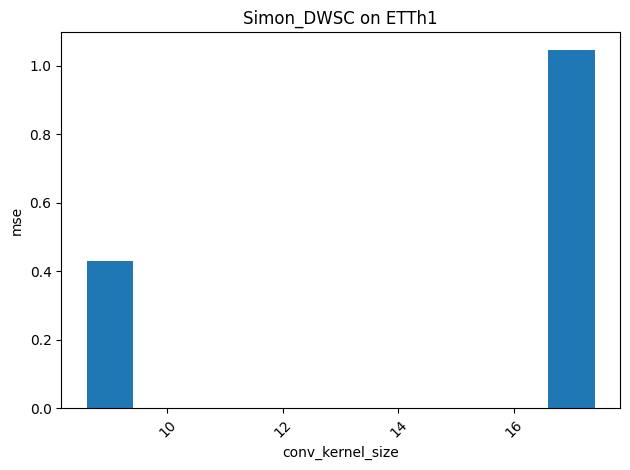

In [14]:
df_hpo = df_subset[(df_subset['model'] == model) & (df_subset['data_path'] == data)]
df_hpo = df_hpo.dropna()

display(df_hpo.head())

# Plotting
plt.bar(df_hpo[hyperparam], df_hpo[metric])
plt.xlabel(hyperparam)
plt.ylabel(metric)
plt.title(model + " on " + data)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()